# Assignment : Clustering of Countries

## Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [2]:
# Reading the country file on which analysis needs to be done

df_country = pd.read_csv('Country-data.csv')

df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df_country.shape

(167, 10)

In [4]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Data Cleansing

In [6]:
# Calculating the Missing Values % contribution in DF

df_null = df_country.isna().mean()*100
df_null

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### Inference:
- None of the columns have null values hence no imputation or drop required.

In [7]:
# Datatype check for the dataframe

df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

#### Inference:
- None of the columns have inconsistent datatype, hence no conversion is required.

In [8]:
# Duplicates check

df_country.loc[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [9]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_country.select_dtypes(include = ['object']).columns
num_col = df_country.select_dtypes(exclude = ['object']).columns

*The dataset seems to be almost clean and hence no such cleansing activities are required.*

## Data Visualization

(9.5, -0.5)

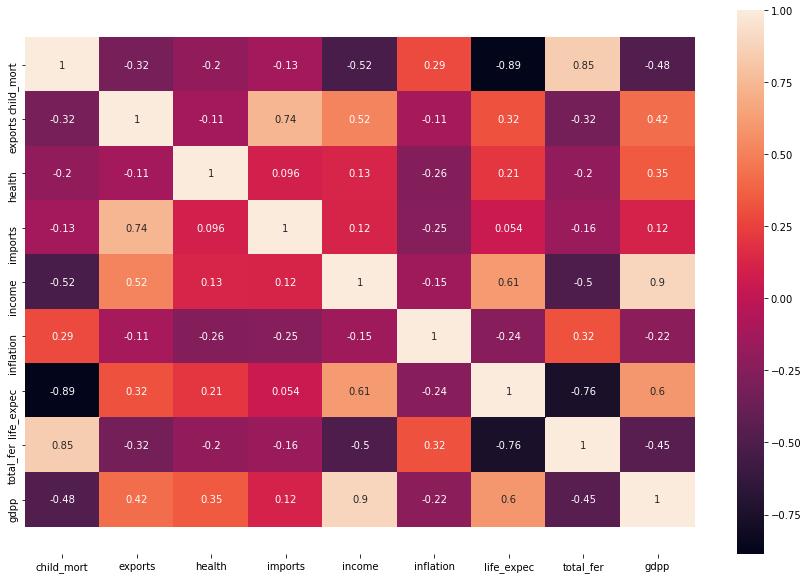

In [10]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
ax = sns.heatmap(df_country.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Inference:
- `child_mortality` and `life_expentency` are highly correlated with correlation of `-0.89`
- `child_mortality` and `total_fertility` are highly correlated with correlation of `0.85`
- `imports` and `exports` are highly correlated with correlation of `0.74`
- `life_expentency` and `total_fertility` are highly correlated with correlation of `-0.76`

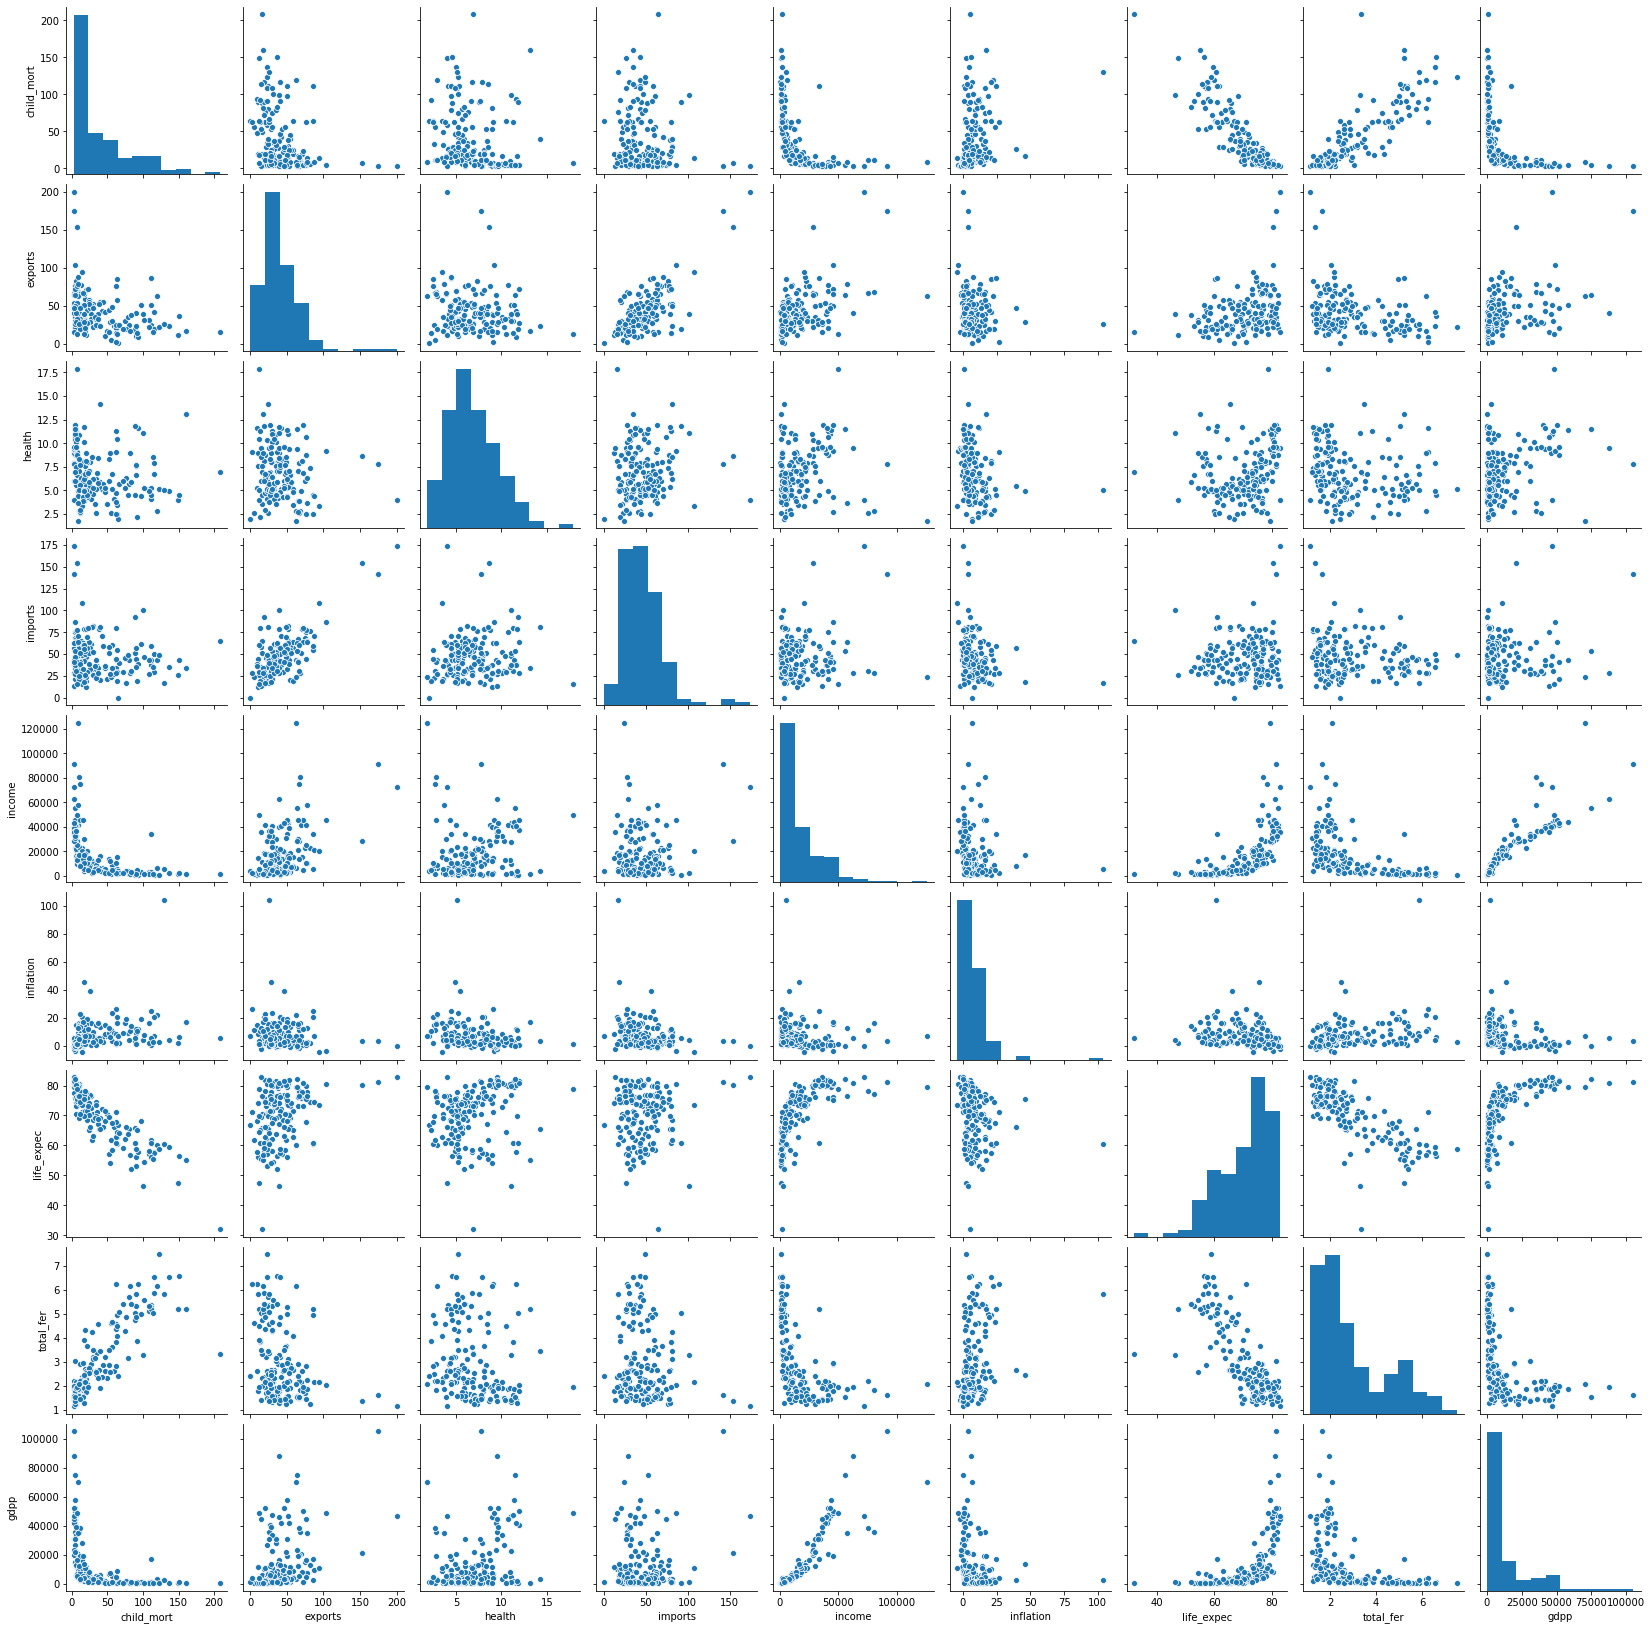

In [11]:
# Pairplot of all numeric columns

sns.pairplot(df_country)

## Data Preparation

In [12]:
# Converting exports,imports and health spending percentages to absolute values.

df_country['exports'] = df_country['exports'] * df_country['gdpp']/100
df_country['imports'] = df_country['imports'] * df_country['gdpp']/100
df_country['health'] = df_country['health'] * df_country['gdpp']/100

In [13]:
df_country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [14]:
# Dropping Country field as final dataframe will only contain data columns

df_country_drop = df_country.copy()
country = df_country_drop.pop('country')

In [15]:
df_country_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Outlier Analysis and Treatment

In [16]:
df_country_drop.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


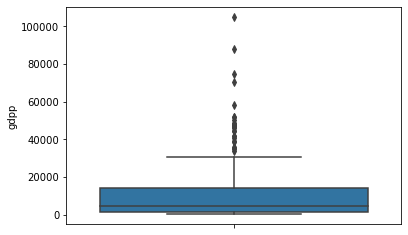

In [17]:
sns.boxplot(df_country_drop.gdpp, orient='v')
plt.show()

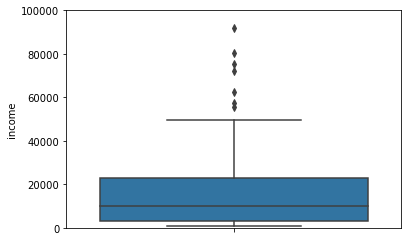

In [18]:
plt.ylim(0, 100000)
sns.boxplot(df_country_drop.income, orient='v')
plt.show()

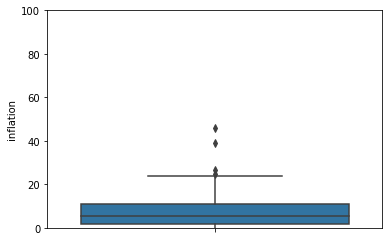

In [19]:
plt.ylim(0, 100)
sns.boxplot(df_country_drop.inflation, orient='v')
plt.show()

We see that gdpp, income and inflation column has high outliers. However let's not remove outliers as this might lead to loss in country details which are not doing well- socio-economically(countries with direst need of aid).

In [20]:
Q1 = df_country_drop.gdpp.quantile(0.05)
Q3 = df_country_drop.gdpp.quantile(0.95)
#IQR = Q3-Q1
country_df = df_country_drop[(df_country_drop.gdpp <= Q3)]

In [21]:
df_country_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Rescaling

In [22]:
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country_drop)

In [23]:
df_country_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [24]:
country_norm = pd.DataFrame(df_country_scaled)
country_norm.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Hopkins Statistics Test

In [25]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [29]:
hopkins(country_norm)

0.9465330438245912

#### Inference:
0.94 is a good Hopkins score for Clustering.

## Model Building

### K- means Clustering

**Finding the Optimal Number of Clusters**

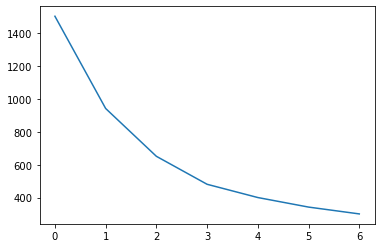

In [30]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(country_norm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### Inference:

Looking at the above elbow curve it looks good to proceed with either 3 or 4 clusters.

### Silhouette Analysis

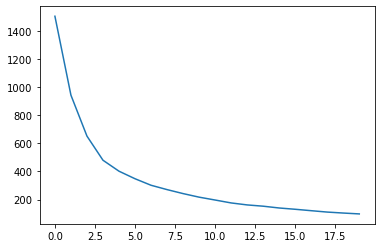

In [31]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_norm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [32]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(country_norm)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42673357397704514
For n_clusters=5, the silhouette score is 0.4324001169216119
For n_clusters=6, the silhouette score is 0.39279369617575527
For n_clusters=7, the silhouette score is 0.3068220382518731
For n_clusters=8, the silhouette score is 0.26474839748627066


In [33]:
#K-means with k=4 clusters

cluster4 = KMeans(n_clusters=4, max_iter=50, random_state= 100)
cluster4.fit(country_norm)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [34]:
# Cluster labels

cluster4.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [35]:
# Assign the label

country_norm['Cluster_Id4'] = cluster4.labels_
country_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id4
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


In [36]:
# Number of countries in each cluster

country_norm['Cluster_Id4'].value_counts()

0    88
1    48
2    30
3     1
Name: Cluster_Id4, dtype: int64

#### Inference:
It seems there are good number of countries in each clusters except for cluster 3.

In [37]:
# Lets drop the Cluster Id created with 4 clusters and proceed with 3 clusters.

country_norm = country_norm.drop('Cluster_Id4',axis=1)

In [39]:
#K-means with k=3 clusters

cluster5 = KMeans(n_clusters=3, max_iter=50,random_state=100)
cluster5.fit(country_norm)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [40]:
# Cluster labels

cluster5.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [41]:
# assign the label

country_norm['Cluster_Id'] = cluster5.labels_
country_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


In [42]:
# Number of countries in each cluster

country_norm['Cluster_Id'].value_counts()

0    91
1    48
2    28
Name: Cluster_Id, dtype: int64

#### Inference:
It seems there are good number of countries in each clusters.

In [43]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [44]:
country_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


In [45]:
df_country['Cluster_Id'] = country_norm['Cluster_Id']

In [46]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [48]:
# Creating df with mean values
cluster_child = pd.DataFrame(df_country.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_country.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_country.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_country.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_country.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_country.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_country.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_country.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_country.groupby(["Cluster_Id"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1,2]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,20.357143,3604.149434,3710.446386,547.279455,13968.021978,7.070549,73.460440,2.235055,7979.912088
1,1,91.610417,879.063521,827.028771,114.821765,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,2,5.046429,31038.239286,25818.100000,4327.163214,50178.571429,3.014679,80.514286,1.760714,48114.285714


In [49]:
df_country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


From the business understanding we have learnt that `Child_Mortality`, `Income`, `Gdpp` are some important factors which decides the development of any country.
Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

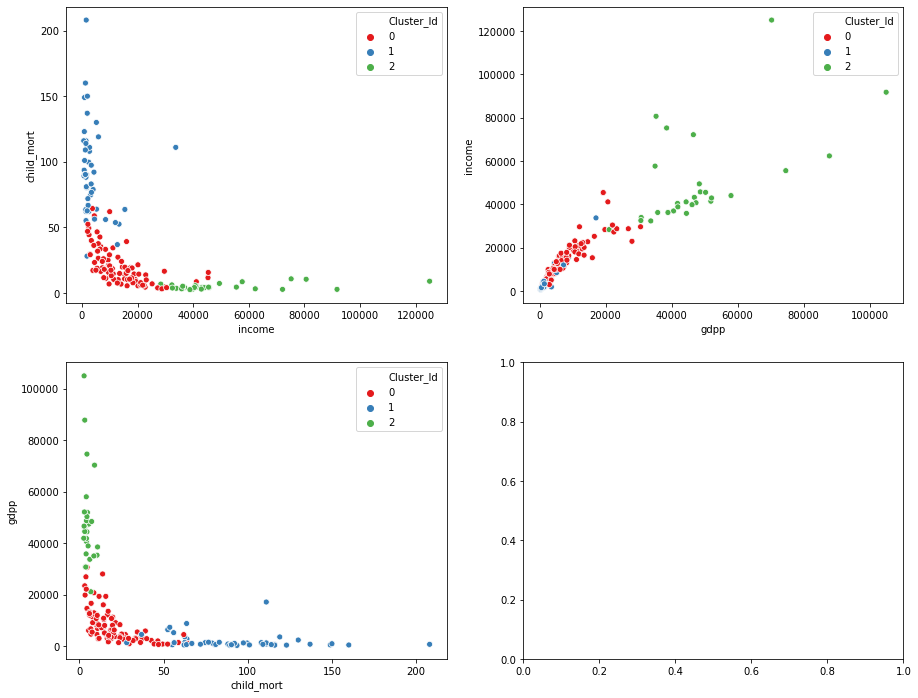

In [52]:
# Scatter plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_country,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_country,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_country,legend='full',palette="Set1",ax=axes[1][0])

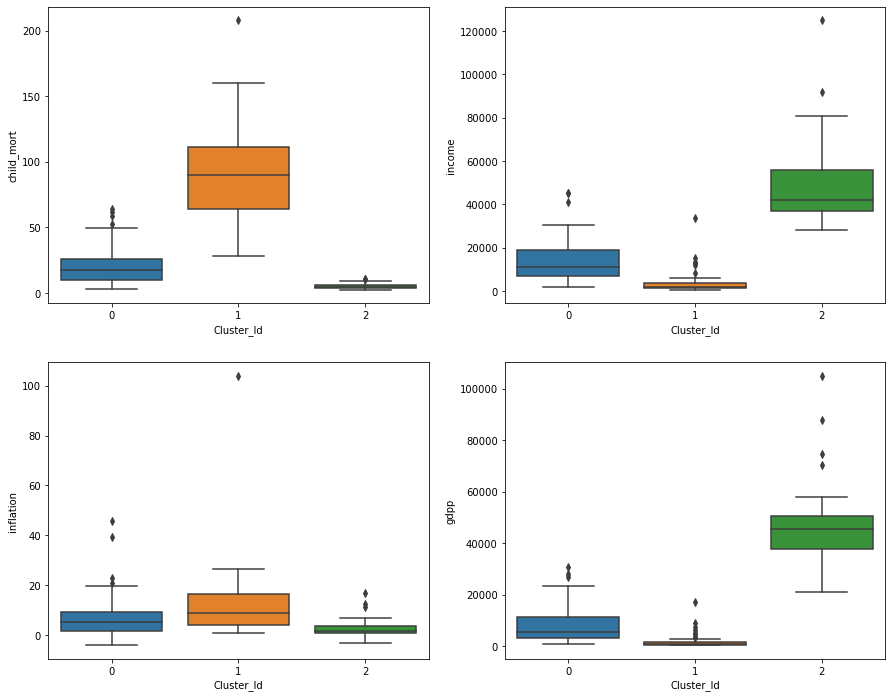

In [53]:
# Box plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = df_country,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = df_country,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=df_country,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=df_country,ax=axes[1][1])

#### Inference:
- Child Mortality is highest for Cluster `1`.This cluster need some aid.
- Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development.
- Income per capita and gdpp seems lowest for countries in cluster `1`. Hence, these countries need some help.

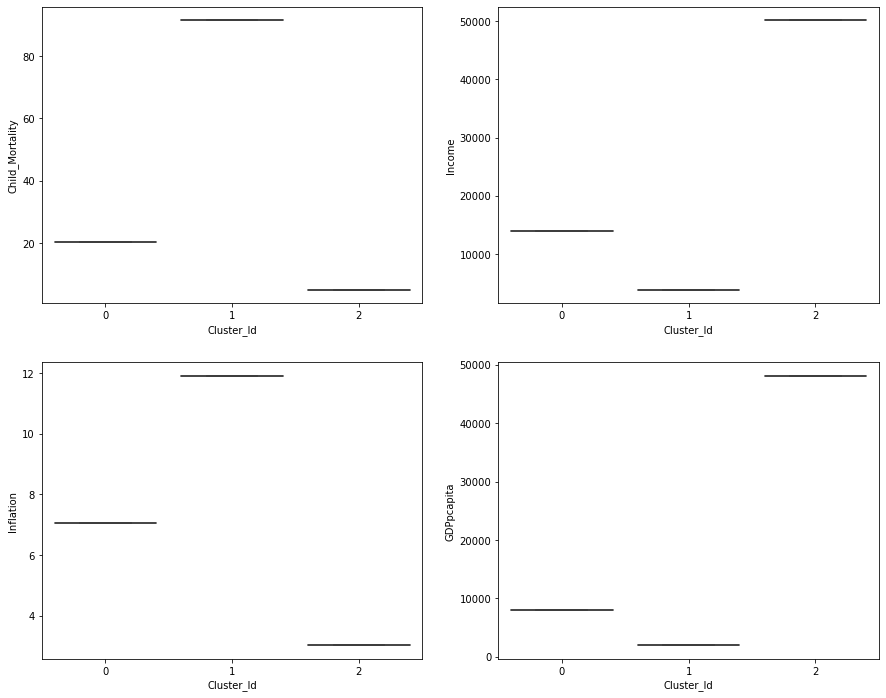

In [54]:
# Box plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'Child_Mortality', data = df_concat,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'Income', data = df_concat,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'Inflation', data=df_concat,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'GDPpcapita', data=df_concat,ax=axes[1][1])

#### Inference:
The mean values suggests the same story as above

In [55]:
# List of countries in Cluster 0

df_country[df_country['Cluster_Id']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,437.46,80.178,393.30,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.90,75.4,2.47,13500,0


In [57]:
# List of countries in Cluster 2

df_country[df_country['Cluster_Id']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,2
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,2
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,2
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,2
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,2
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,2
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,2


### Hierarchical Clustering

In [61]:
df_cluster_drop = country_norm.copy()
cluster = df_cluster_drop.pop('Cluster_Id')

df_cluster_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


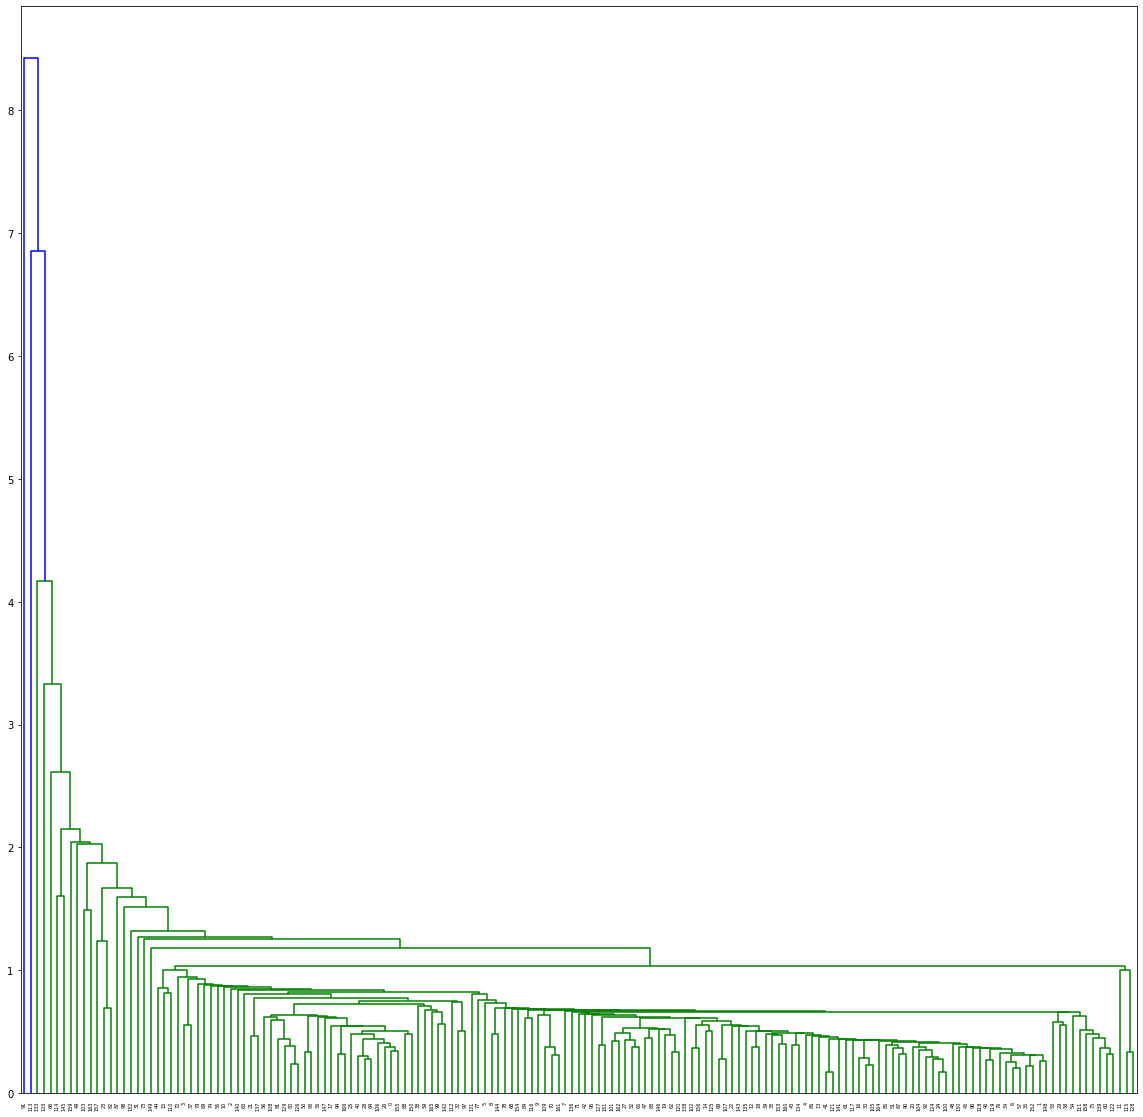

In [63]:
# Single linkage
plt.figure(figsize=(20,20))
mergings = linkage(df_cluster_drop, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

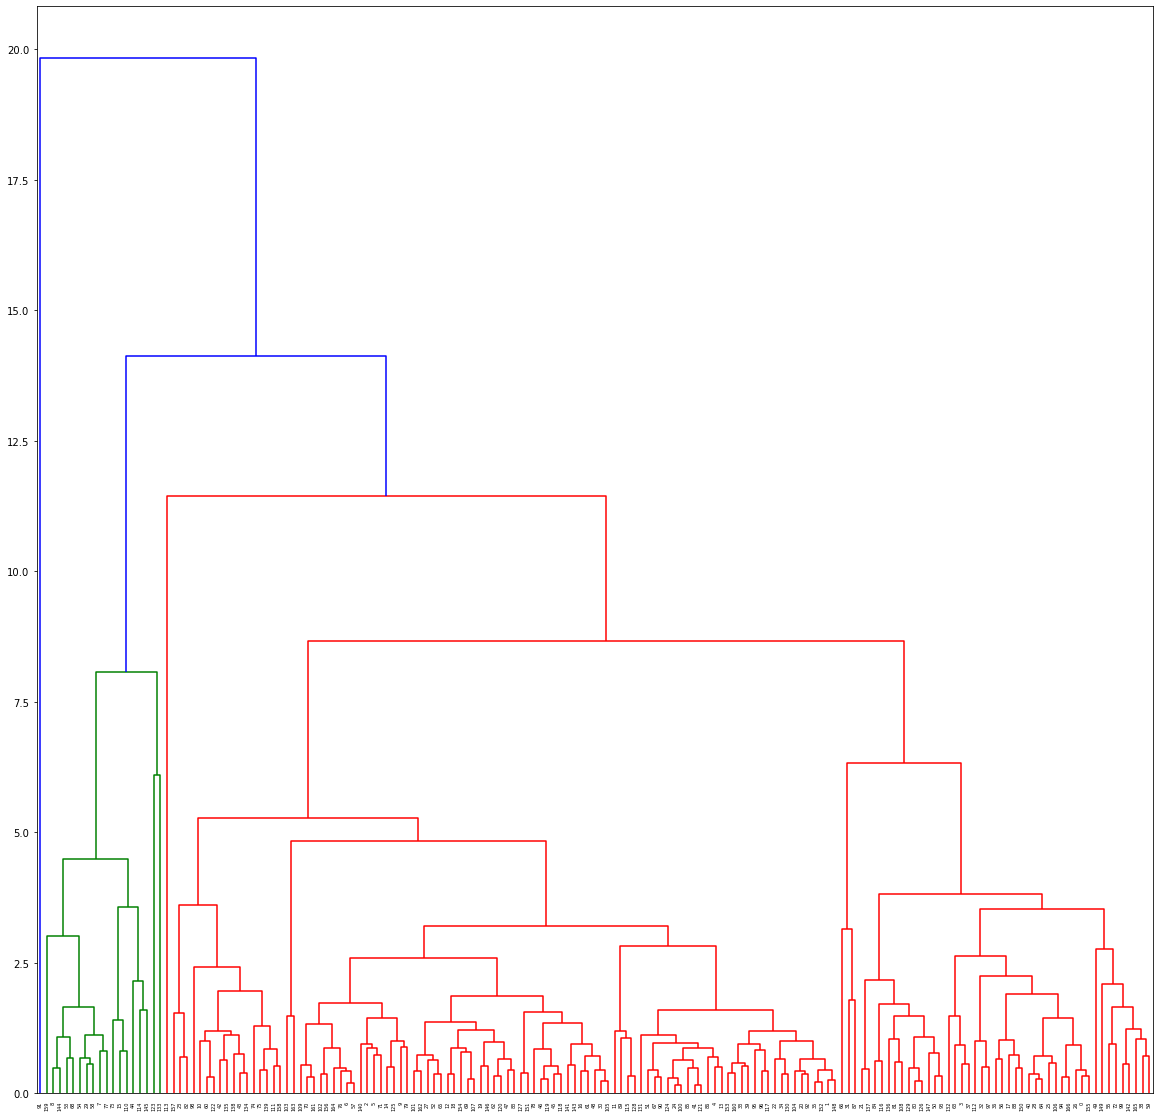

In [64]:
# Complete Linkage
plt.figure(figsize=(20,20))
mergings = linkage(df_cluster_drop, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [72]:
# Let cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df_cluster_drop, clusterCut], axis=1)
df_hc.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']

In [73]:
df_hc.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


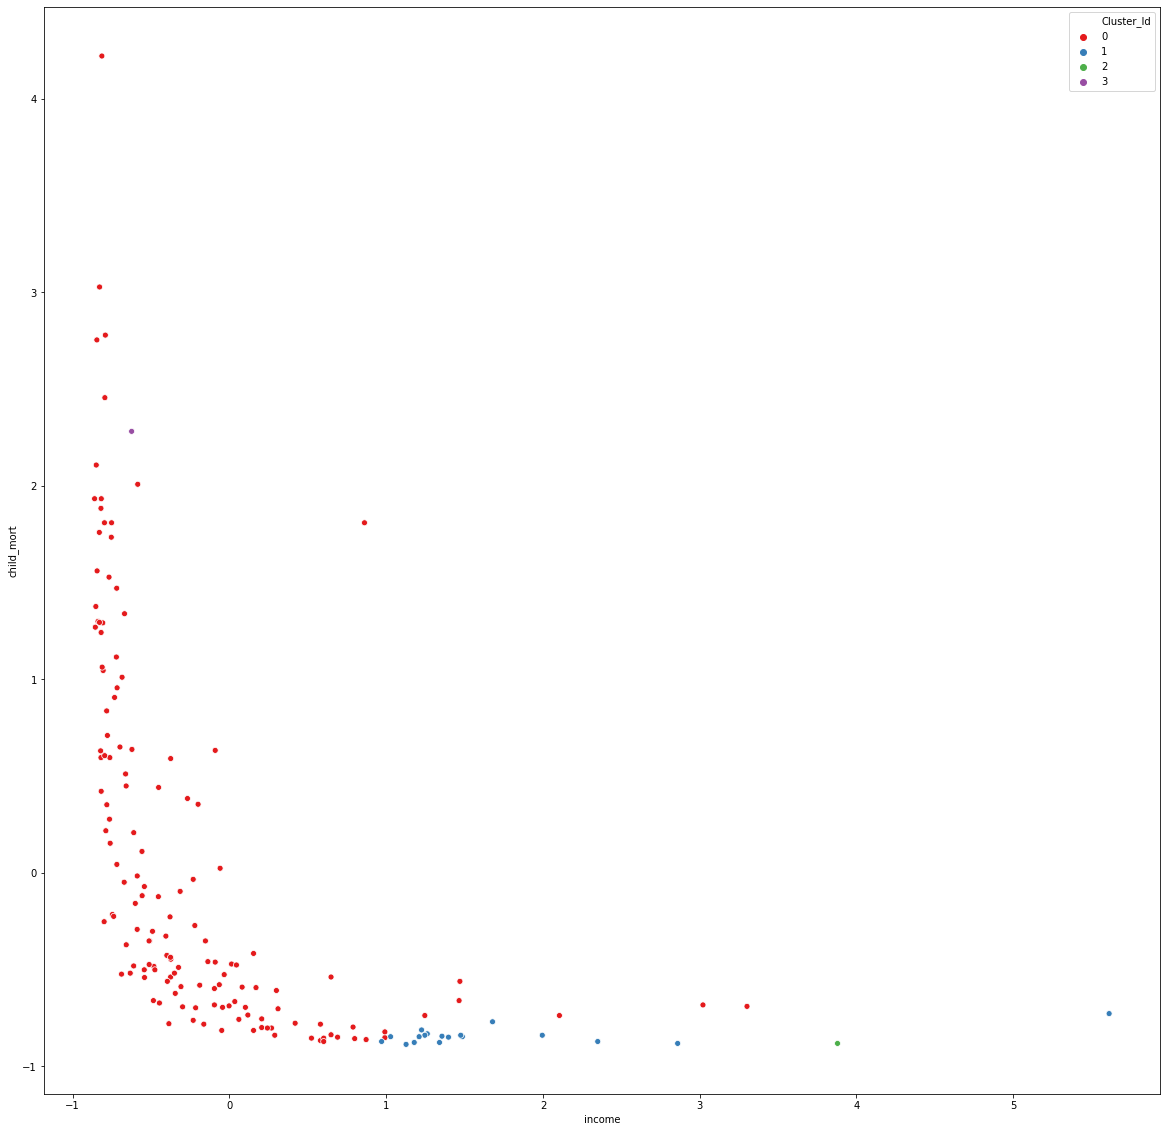

In [76]:
plt.figure(figsize=(20,20))
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_hc,legend='full',palette="Set1")

#### Inference:
Cluster `2` and `3` seems to be not properly formed

In [77]:
df_merge_col_hc = df_country.copy()
df_merge_col_hc['country'] = df_country['country']

In [78]:
df_merge_col_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


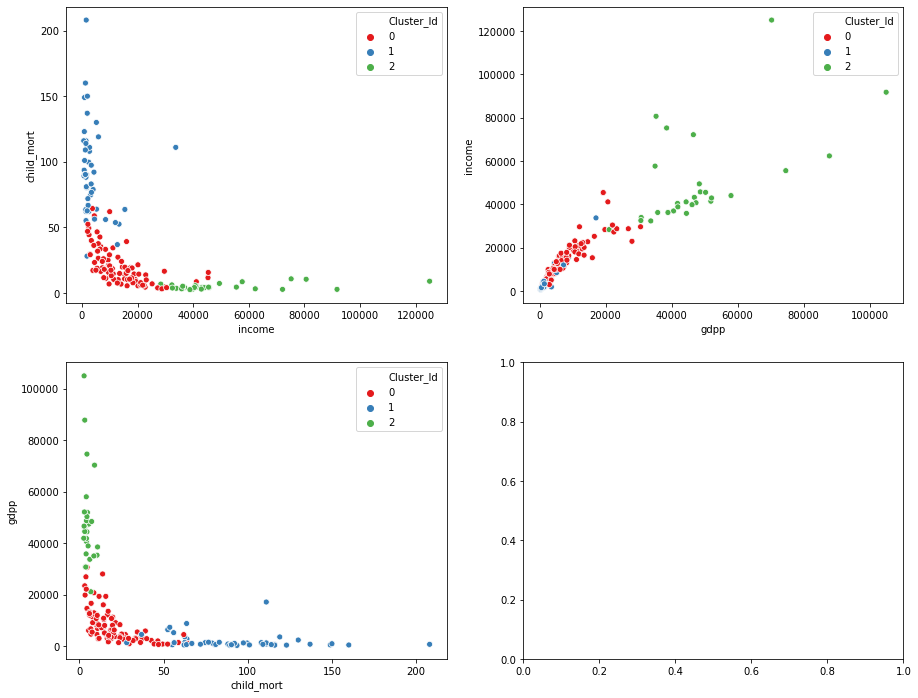

In [79]:
# Scatter plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col_hc,legend='full',palette="Set1",ax=axes[1][0])

**We have analyzed both K-means and Hierarchial clustering and found clusters formed are identical.
The clusters formed in both the cases are not that great.
we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.**

## Final Analysis

We got Cluster `1` which need aid.

In [82]:
df_clus = df_country[df_country['Cluster_Id'] ==1]

In [83]:
df_clus.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,1


In [84]:
df_clus.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,1.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,1.036192,2925.911009,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,1.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,1.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,1.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,1.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000,1.0


We have removed few countries during outlier treatment but we might have dropped some countries which might be in need of help.

In [85]:
# Based on final clusters information we are going to deduce the final list.
# We observed that mean child mortality is 92 for the selected clusters and hence 
# let's take all the countries with more than this child mortality .

df_final_list = df_country[df_country['child_mort']>92]
df_final_list.shape

(21, 11)

In [86]:
# Let's check the demographic of the resultant data again

df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,121.704762,1010.792248,83.584857,850.461429,3639.190476,14.191667,56.547619,5.431905,1708.190476,1.0
std,27.164489,3164.988809,159.534694,2143.001506,7039.657972,21.894914,7.401798,1.042999,3607.677295,0.0
min,92.100000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,1.0
25%,108.000000,101.286000,26.796000,170.868000,1190.000000,4.150000,55.600000,5.110000,446.000000,1.0
50%,114.000000,161.424000,40.634100,279.936000,1820.000000,6.810000,57.700000,5.340000,708.000000,1.0
75%,130.000000,460.980000,64.660000,428.314000,2690.000000,17.200000,60.100000,6.160000,1200.000000,1.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,68.200000,7.490000,17100.000000,1.0


In [87]:
# We observed that mean income is 3639 for the selected clusters and hence 
# let's take all the countries with less than this income .

df_final_list1 = df_final_list[df_final_list['income']<=3639]
df_final_list1.shape

(17, 11)

In [88]:
# Let's check the demographic of the resultant data again

df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,123.747059,213.279835,43.975647,333.308235,1611.352941,7.989706,55.335294,5.471176,698.352941,1.0
std,29.176320,187.106274,26.677977,274.763937,781.538942,6.497282,7.693174,1.074778,345.567638,0.0
min,93.600000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,1.0
25%,108.000000,81.503000,26.796000,170.200000,918.000000,2.970000,55.000000,5.110000,419.000000,1.0
50%,114.000000,137.274000,38.755000,248.508000,1430.000000,5.450000,57.300000,5.340000,648.000000,1.0
75%,137.000000,290.820000,52.269000,390.195000,1930.000000,12.300000,58.000000,6.260000,897.000000,1.0
max,208.000000,617.320000,129.870000,1181.700000,3320.000000,20.800000,68.200000,7.490000,1310.000000,1.0


In [89]:
# We observed that mean gdpp is 698 for the selected clusters and hence 
# let's take all the countries with less than this gdpp .

df_final_list2 = df_final_list1[df_final_list1['gdpp']<=698]
df_final_list2.shape

(10, 11)

#### Final List of countries which are in need of the aid based on socio-economic factors.

In [90]:
df_final_list2['country']

25                 Burkina Faso
26                      Burundi
31     Central African Republic
37             Congo, Dem. Rep.
63                       Guinea
64                Guinea-Bissau
66                        Haiti
106                  Mozambique
112                       Niger
132                Sierra Leone
Name: country, dtype: object

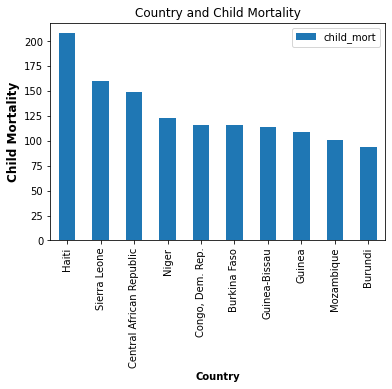

In [91]:
# BarPlot for Child Mortality of countries which are in need of aid

df_list_cm = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

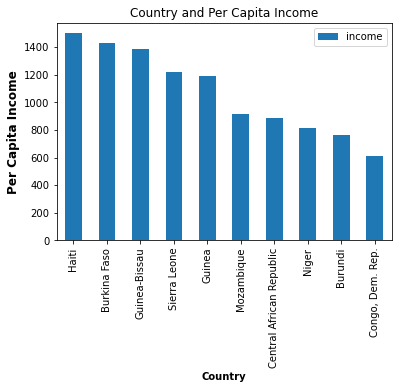

In [92]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(df_final_list2.groupby(['country'])['income'].mean().sort_values(ascending = False))
df_list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

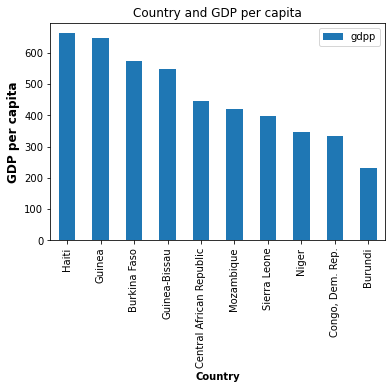

In [93]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

### Closing Statement

Based on clusters we have identified the below list of countries which are in dire need of aid.
The list of countries are subject to change as it is based on the few factors like `Number of Clusters chosen`, `Clustering method used` etc.which we have used to build the model. 

In [94]:
# Final countries list
df_final_list2.reset_index(drop=True).country

0                Burkina Faso
1                     Burundi
2    Central African Republic
3            Congo, Dem. Rep.
4                      Guinea
5               Guinea-Bissau
6                       Haiti
7                  Mozambique
8                       Niger
9                Sierra Leone
Name: country, dtype: object

# Thank You 